# ***1. Unzip dataset***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pwd

/content


In [ ]:
! unzip /content/drive/MyDrive/facemaskdataset.zip

Archive:  /content/drive/MyDrive/facemaskdataset.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: 

# ***2. Extract csv from xml files***

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[5][0].text),
                     int(member[5][1].text),
                     int(member[5][2].text),
                     int(member[5][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
xml_to_csv('/content/annotations').to_csv('/content/annotations/labels.csv', index=False)

In [ ]:
labels=pd.read_csv('/content/annotations/labels.csv')
labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,maksssksksss745.png,301,400,with_mask,146,228,223,328
1,maksssksksss80.png,400,226,with_mask,214,54,291,132
2,maksssksksss332.png,301,400,with_mask,62,213,166,319
3,maksssksksss577.png,400,267,with_mask,106,61,117,72
4,maksssksksss577.png,400,267,without_mask,137,67,152,80


In [ ]:
labels.shape

(4072, 8)

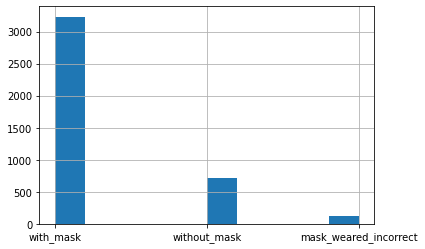

In [ ]:
labels['class'].hist()

In [ ]:
mask_weared_incorrect_images=labels['filename'].loc[labels['class']=='mask_weared_incorrect'].unique()

In [ ]:
# File location
location = "/content/images"

for file in mask_weared_incorrect_images:
  path = os.path.join(location, file)
  print(path)
  os.remove(path)

/content/images/maksssksksss173.png
/content/images/maksssksksss431.png
/content/images/maksssksksss305.png
/content/images/maksssksksss741.png
/content/images/maksssksksss659.png
/content/images/maksssksksss206.png
/content/images/maksssksksss371.png
/content/images/maksssksksss748.png
/content/images/maksssksksss130.png
/content/images/maksssksksss495.png
/content/images/maksssksksss693.png
/content/images/maksssksksss564.png
/content/images/maksssksksss440.png
/content/images/maksssksksss611.png
/content/images/maksssksksss176.png
/content/images/maksssksksss11.png
/content/images/maksssksksss658.png
/content/images/maksssksksss760.png
/content/images/maksssksksss562.png
/content/images/maksssksksss156.png
/content/images/maksssksksss250.png
/content/images/maksssksksss52.png
/content/images/maksssksksss680.png
/content/images/maksssksksss815.png
/content/images/maksssksksss459.png
/content/images/maksssksksss496.png
/content/images/maksssksksss672.png
/content/images/maksssksksss30

In [ ]:
print("Length of labels before removing images:",len(labels))
for i in mask_weared_incorrect_images:
  #print(labels.loc[c==i].index)
  labels.drop(labels.loc[labels['filename']==i].index, inplace=True)
print("Length of labels after removing images:",len(labels))


Length of labels before removing images: 4072
Length of labels after removing images: 3168


In [ ]:
labels['filename'].nunique()

756

In [ ]:
dir='/content/images'
list = os.listdir(dir)
number_files = len(list)
print (number_files)

756


In [ ]:
type(labels['filename'].unique())

numpy.ndarray

In [ ]:
import glob
# All files and directories ending with .txt and that don't begin with a dot:
print(len(glob.glob("/content/images/*.png")))

756


In [ ]:
for i in list:
  if i not in labels['filename'].unique():
    print(i)

# ***3. Doing test and train split***

In [ ]:
pip install split-folders

In [ ]:

import shutil, os
files = ['/content/images']
for f in files:
    shutil.move(f, '/content/dataset/images')


In [ ]:
import splitfolders
splitfolders.ratio("/content/dataset", output="/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 756 files [00:11, 67.82 files/s]


In [ ]:
!pwd

/content


In [ ]:
cd /content/drive/MyDrive/TFOD1.x/workspace/training_demo/images

/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images


In [ ]:
!pwd

/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images


In [ ]:
!ls

train  val


In [ ]:
!mv val test

In [ ]:
!ls

test  train


In [ ]:
files = ['/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test/images']
for f in files:
    shutil.move(f, '/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test_data')

In [ ]:
files = ['/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train/images']
for f in files:
    shutil.move(f, '/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train_data')

In [ ]:
rmdir test

In [ ]:
rmdir train

In [ ]:
!mv test_data test

In [ ]:
!mv train_data train

In [ ]:
print(len(glob.glob("/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test/*.*")))
print(len(glob.glob("/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test/*.png")))


152
152


In [ ]:
print(len(glob.glob("/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train/*.*")))
print(len(glob.glob("/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train/*.png")))

604
604


# ***3. Prepare csv file based on test and train data***

In [ ]:
# For test data
import shutil


test=pd.DataFrame()
for i in glob.glob("/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test/*.png"):
  #print(i)
  image_filename=i.split('/')[-1]
  #print(image_filename)
  test = test.append(labels.loc[labels['filename']==image_filename])
  # Moving xml files
  source_path="/content/annotations/"+image_filename.split('.')[-2]+'.xml'
  destination_path = "/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/test/"+image_filename.split('.')[-2]+'.xml'
  shutil.move(source_path, destination_path)

print(test)

                 filename  width  height         class  xmin  ymin  xmax  ymax
3233  maksssksksss784.png    400     225  without_mask    17    59    39    82
3234  maksssksksss784.png    400     225     with_mask    43    59    71    92
3235  maksssksksss784.png    400     225     with_mask    91    78   120   108
3236  maksssksksss784.png    400     225     with_mask   110    43   141    77
3237  maksssksksss784.png    400     225     with_mask   138    82   169   112
...                   ...    ...     ...           ...   ...   ...   ...   ...
2059  maksssksksss648.png    400     267     with_mask   117    73   136    99
2060  maksssksksss648.png    400     267     with_mask   194    24   225    62
2061  maksssksksss648.png    400     267     with_mask   251    75   268    94
1415  maksssksksss738.png    400     267     with_mask    82    43   123    83
1416  maksssksksss738.png    400     267     with_mask   211    27   244    70

[708 rows x 8 columns]


In [ ]:
test['filename'].nunique()

152

In [ ]:
test.to_csv('/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/test.csv',index=False)

In [ ]:
test_labels_created=pd.read_csv('/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/test.csv')
test_labels_created.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,maksssksksss784.png,400,225,without_mask,17,59,39,82
1,maksssksksss784.png,400,225,with_mask,43,59,71,92
2,maksssksksss784.png,400,225,with_mask,91,78,120,108
3,maksssksksss784.png,400,225,with_mask,110,43,141,77
4,maksssksksss784.png,400,225,with_mask,138,82,169,112


In [ ]:
test_labels_created.shape

(708, 8)

In [ ]:

 
# For train data
train_csv=pd.DataFrame()
for i in glob.glob("/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train/*.png"):
  #print(i)
  image_filename=i.split('/')[-1]
  #print(image_filename)
  train_csv = train_csv.append(labels.loc[labels['filename']==image_filename])
  # Moving xml files
  source_path="/content/annotations/"+image_filename.split('.')[-2]+'.xml'
  destination_path = "/content/drive/MyDrive/TFOD1.x/workspace/training_demo/images/train/"+image_filename.split('.')[-2]+'.xml'
  shutil.move(source_path, destination_path)
print(train_csv)

                 filename  width  height      class  xmin  ymin  xmax  ymax
2260  maksssksksss382.png    400     300  with_mask   324    89   340   111
2261  maksssksksss382.png    400     300  with_mask   256   111   274   128
2262  maksssksksss382.png    400     300  with_mask   195    96   215   114
2263  maksssksksss382.png    400     300  with_mask   139   105   158   126
2264  maksssksksss382.png    400     300  with_mask    64    95    82   121
...                   ...    ...     ...        ...   ...   ...   ...   ...
1781   maksssksksss42.png    400     353  with_mask   306   248   366   313
1395  maksssksksss662.png    400     261  with_mask    49    80    67    97
1396  maksssksksss662.png    400     261  with_mask    96    47   110    62
1397  maksssksksss662.png    400     261  with_mask   213    57   230    77
1398  maksssksksss662.png    400     261  with_mask   350    43   372    67

[2460 rows x 8 columns]


In [ ]:
train_csv['filename'].nunique()

604

In [ ]:
train_csv.to_csv('/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/train.csv',index=False)

In [ ]:
train_labels_created=pd.read_csv('/content/drive/MyDrive/TFOD1.x/workspace/training_demo/annotations/train.csv')
train_labels_created.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,maksssksksss382.png,400,300,with_mask,324,89,340,111
1,maksssksksss382.png,400,300,with_mask,256,111,274,128
2,maksssksksss382.png,400,300,with_mask,195,96,215,114
3,maksssksksss382.png,400,300,with_mask,139,105,158,126
4,maksssksksss382.png,400,300,with_mask,64,95,82,121


In [ ]:
train_labels_created.shape

(2460, 8)